In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/automated-essay-scoring-2.0/other/essayscoring/1/model_checkpoint.weights.h5
/kaggle/input/deberta_v3/keras/deberta_v3_extra_small_en/2/config.json
/kaggle/input/deberta_v3/keras/deberta_v3_extra_small_en/2/tokenizer.json
/kaggle/input/deberta_v3/keras/deberta_v3_extra_small_en/2/metadata.json
/kaggle/input/deberta_v3/keras/deberta_v3_extra_small_en/2/model.weights.h5
/kaggle/input/deberta_v3/keras/deberta_v3_extra_small_en/2/assets/tokenizer/vocabulary.spm
/kaggle/input/learning-agency-lab-automated-essay-scoring-2/sample_submission.csv
/kaggle/input/learning-agency-lab-automated-essay-scoring-2/train.csv
/kaggle/input/learning-agency-lab-automated-essay-scoring-2/test.csv


In [3]:
! pip install pyspellchecker


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 62.9 MB/s eta 0:00:0000:0100:01


In [4]:
import matplotlib.pyplot as plt
import tensorflow as tf
import polars as pl
import spacy
from spellchecker import SpellChecker

from collections import OrderedDict, Counter, defaultdict
import re

In [5]:
import os
import re
import numpy as np 
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt

from tqdm import tqdm
import json, string
from typing import List

import spacy
from spellchecker import SpellChecker

from collections import OrderedDict, Counter, defaultdict

import lightgbm as lgb
from lightgbm import LGBMClassifier
from lightgbm import log_evaluation, early_stopping



import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures

from sklearn.cluster import KMeans
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import KFold, GroupKFold, StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics.pairwise import cosine_distances
from sklearn.metrics import mean_squared_error, cohen_kappa_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score

from tqdm import tqdm
tqdm.pandas()

import warnings
warnings.simplefilter("ignore")

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [6]:
!pip install textstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 41.2 MB/s eta 0:00:0000:01


In [7]:
import textstat
from textblob import TextBlob

In [50]:
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data

In [12]:
df = pd.read_csv('/kaggle/input/learning-agency-lab-automated-essay-scoring-2/train.csv')

## Distribution of score

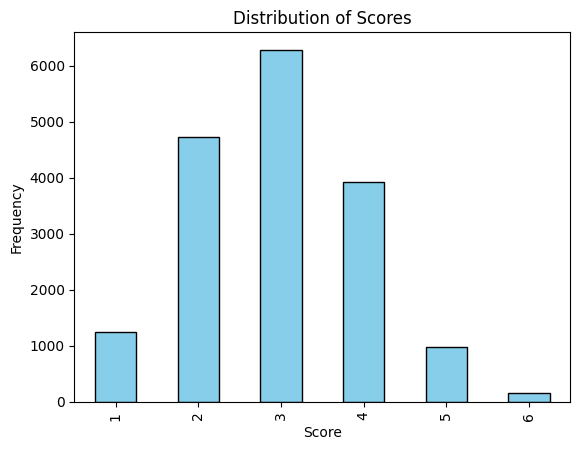

In [4]:
score_distribution = df['score'].value_counts().sort_index()

# Plot the distribution using a bar chart
score_distribution.plot(kind='bar', color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [8]:
# This is the list for stop words
stopwords_list = [
    "a", "about", "above", "according", "across", "actually", "adj", "after", "afterwards", "again",
    "all", "almost", "along", "already", "also", "although", "always", "among", "amongst", "an",
    "am", "and", "another", "any", "anyhow", "anyone", "anything", "anywhere", "are", "aren",
    "aren't", "around", "as", "at", "be", "became", "because", "become", "becomes", "been",
    "beforehand", "begin", "being", "below", "beside", "besides", "between", "both", "but", "by",
    "can", "cannot", "can't", "caption", "co", "come", "could", "couldn", "couldn't", "did", "didn",
    "didn't", "do", "does", "doesn", "doesn't", "don", "don't", "down", "during", "each", "early",
    "eg", "either", "else", "elsewhere", "end", "ending", "enough", "etc", "even", "ever", "every",
    "everywhere", "except", "few", "for", "found", "from", "further", "had", "has", "hasn", "hasn't",
    "have", "haven", "haven't", "he", "hence", "her", "here", "hereafter", "hereby", "herein",
    "hereupon", "hers", "him", "his", "how", "however", "ie", "i.e.", "if", "in", "inc", "inc.",
    "indeed", "instead", "into", "is", "isn", "isn't", "it", "its", "itself", "last", "late",
    "later", "less", "let", "like", "likely", "ll", "ltd", "made", "make", "makes", "many", "may",
    "maybe", "me", "meantime", "meanwhile", "might", "miss", "more", "most", "mostly", "mr", "mrs",
    "much", "must", "my", "myself", "namely", "near", "neither", "never", "nevertheless", "new",
    "next", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "not", "now", "NULL",
    "of", "off", "often", "on", "once", "only", "onto", "or", "other", "others", "otherwise", "our",
    "ours", "ourselves", "out", "over", "own", "per", "perhaps", "rather", "re", "said", "same",
    "say", "seem", "seemed", "seeming", "seems", "several", "she", "should", "shouldn", "shouldn't",
    "since", "so", "some", "still", "stop", "such", "taking", "ten", "than", "that", "the", "their",
    "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "therefore",
    "therein", "thereupon", "these", "they", "this", "those", "though", "thousand", "through",
    "throughout", "thru", "thus", "to", "together", "too", "toward", "towards", "under", "unless",
    "unlike", "unlikely", "until", "up", "upon", "us", "use", "used", "using", "ve", "very", "via",
    "was", "wasn", "we", "well", "were", "weren", "weren't", "what", "whatever", "when", "whence",
    "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "whereupon", "wherever",
    "whether", "which", "while", "whither", "who", "whoever", "whole", "whom", "whomever", "whose",
    "why", "will", "with", "within", "without", "won", "would", "wouldn", "wouldn't", "yes", "yet",
    "you", "your", "yours", "yourself", "yourselves"
]

final_stopwords_list = list(set(stopwords.words('english')) | set(stopwords_list))
print(len(final_stopwords_list))

337


In [9]:
contractions = {
    "ain't": "am not", "aren't": "are not", "can't": "cannot", "can't've": "cannot have", "'cause": "because", "could've": "could have",
    "couldn't": "could not", "couldn't've": "could not have", "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not",
    "hadn't've": "had not have", "hasn't": "has not", "haven't": "have not", 
    "he'd": "he would",  ## --> he had or he would
    "he'd've": "he would have","he'll": "he will", "he'll've": "he will have", "he's": "he is", 
    "how'd": "how did","how'd'y": "how do you","how'll": "how will","how's": "how is",
    "I'd": "I would",   ## --> I had or I would
    "I'd've": "I would have","I'll": "I will","I'll've": "I will have","I'm": "I am","I've": "I have","isn't": "is not",
    "it'd": "it had",   ## --> It had or It would
    "it'd've": "it would have","it'll": "it will","it'll've": "it will have","it's": "it is",
    "let's": "let us","ma'am": "madam","mayn't": "may not","might've": "might have","mightn't": "might not","mightn't've": "might not have",
    "must've": "must have","mustn't": "must not","mustn't've": "must not have",
    "needn't": "need not","needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not", "oughtn't've": "ought not have",
    "shan't": "shall not","sha'n't": "shall not","shan't've": "shall not have",
    "she'd": "she would",   ## --> It had or It would
    "she'd've": "she would have","she'll": "she will","she'll've": "she will have","she's": "she is",
    "should've": "should have","shouldn't": "should not","shouldn't've": "should not have",
    "so've": "so have","so's": "so is",
    "that'd": "that would",
    "that'd've": "that would have","that's": "that is",
    "there'd": "there had",
    "there'd've": "there would have","there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have","they'll": "they will","they'll've": "they will have","they're": "they are","they've": "they have",
    "to've": "to have","wasn't": "was not","weren't": "were not",
    "we'd": "we had",
    "we'd've": "we would have","we'll": "we will","we'll've": "we will have","we're": "we are","we've": "we have",
    "what'll": "what will","what'll've": "what will have","what're": "what are","what's": "what is","what've": "what have",
    "when's": "when is","when've": "when have",
    "where'd": "where did","where's": "where is","where've": "where have",
    "who'll": "who will","who'll've": "who will have","who's": "who is","who've": "who have","why's": "why is","why've": "why have",
    "will've": "will have","won't": "will not","won't've": "will not have",
    "would've": "would have","wouldn't": "would not","wouldn't've": "would not have",
    "y'all": "you all","y'alls": "you alls","y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are",
    "y'all've": "you all have","you'd": "you had","you'd've": "you would have","you'll": "you you will","you'll've": "you you will have",
    "you're": "you are",  "you've": "you have"
}

contraction_pattern = re.compile('(%s)' % '|'.join(contractions .keys()))

def expand_contractions(text):
    def replace(match):
        return contractions[match.group(0)]
    return contraction_pattern.sub(replace, text)

In [10]:
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)
    text = re.sub(r'\s+', ' ', text)
    return text

def remove_stopwords(text):
    tokens = nltk.word_tokenize(text)
    stop_words = set(final_stopwords_list)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

def lemmatization(text):
    words = nltk.word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words if len(word) > 1]
    return ' '.join(lemmatized_words)

def preprocess_with_contractions_and_punctuation_removal(text):
    text = text.lower() # Convert words to lowercase
    text = re.sub(r'<.*?>', '', text)  # Remove HTML
    text = expand_contractions(text)
    text = remove_stopwords(text) # Remove stopwords
    text = re.sub("@\w+", '',text) # Delete strings starting with @
    text = text.replace(u'\xa0',' ') # Remove \xa0
    text = re.sub("'\d+", '',text) # Delete Numbers
    text = re.sub("\d+", '',text)
    text = re.sub(r'_+', ' ', text)
    text = re.sub("http\w+", '',text)     # Delete URL
    text = remove_punctuation(text) # Remove punctuation
    text = re.sub(r"\s+", " ", text) # Replace consecutive empty spaces with a single space character
    text = lemmatization(text) # Lemmatizing
    text = text.strip()
    return text

In [11]:
import re
def preprocess_data(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text) # Remove HTML
    text = re.sub("@\w+", '',text)     # Delete strings starting with @
    text = re.sub("\d+", '',text)
    text = re.sub("'\d+", '',text) # Delete Numbers
    text = re.sub("http\w+", '',text) # Delete URL
    text = text.replace(u'\xa0',' ') # Remove \xa0
    text = re.sub(r'_+', ' ', text)
    text = re.sub(r"\s+", " ", text)
    text = expand_contractions(text)
    # Replace consecutive commas and periods with one comma and period character
    text = re.sub(r"\.+", ".", text)
    text = re.sub(r"\,+", ",", text)
    text = re.sub(r"\s+", " ", text) # Replace consecutive empty spaces with a single space character
    text = text.strip()
    return text

### remove_duplicates:
used to remove duplicating sentence in an essay. There is a case in score 2 where there is a very long essay but the content is repeated setences. To process that kind of behavior, I'm removing duplicating sentences in essays.

### preprocessing_for_paragraphs: 
just normalize the text so that each \n\n is garantee to be the separator betweens paragraphs. It handles case where there are abundance of \n\n and if the text after the \n\n is undercase - which it will just treat as a another sentence in the paragrahph (not as a paragraph).

### extract_paragraphs:
Extract paragraph by using \n\n as delimitor.

In [13]:
def remove_duplicates(text):
    sentences = text.split('. ')
    
    # Use an OrderedDict to remove duplicates while preserving order
    unique_sentences = list(OrderedDict.fromkeys(sentences))
    
    # Join the unique sentences back into a single string
    result = '. '.join(unique_sentences)
    
    # Ensure the final sentence ends with a period if it originally did
    if text.endswith('.'):
        result += '.'
    
    return result

def extract_sentences(text):
    # Use a regular expression to split the text into sentences
    # This will handle periods, exclamation marks, and question marks as sentence terminators
    sentences = re.split(r'[.!?]+\s*', text)
    sentences = [s.strip() for s in sentences if s.strip()]
    return sentences

def extract_words(text):
    words = re.findall(r"\w+(?:[-']\w+)*", text)
    return words

def preprocessing_for_paragraphs(text):
    # If before /n/n is not a mark, this is not the end of a paragraph    
    text = re.sub(r'(?<![\.\!\?])\n\n', ' ', text)

    #If after \n\n is an normal case, replace with space
    text = re.sub(r'\n\n([a-z])', ' ', text)
    
    return text.strip()

def extract_paragraphs(text):
    processed_text = preprocessing_for_paragraphs(text)
    paragraphs = processed_text.split('\n\n')
    
    return paragraphs

In [14]:
columns = [(pl.col("full_text").apply(extract_paragraphs).alias("paragraph"))]
df = pl.from_pandas(df).with_columns([pl.col("full_text").apply(remove_duplicates)])

df = df.with_columns(columns)


/tmp/ipykernel_33/560876725.py:1: DeprecationWarning: `apply` is deprecated. It has been renamed to `map_elements`.
  columns = [(pl.col("full_text").apply(extract_paragraphs).alias("paragraph"))]
/tmp/ipykernel_33/560876725.py:2: DeprecationWarning: `apply` is deprecated. It has been renamed to `map_elements`.
  df = pl.from_pandas(df).with_columns([pl.col("full_text").apply(remove_duplicates)])
/tmp/ipykernel_33/560876725.py:2: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  df = pl.from_pandas(df).with_columns([pl.col("full_text").apply(remove_duplicates)])
/tmp/ipykernel_33/560876725.py:4: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  df = df.with_columns(columns)


* Paragraph_Preprocess: Calculate features paragraph_len, paragraph_sentence_cnt and paragraph_word_cnt.
* Paragraph_Eng: Calculate more advanced features that based on classification of paragraph_len - by bucket (the size probably change a lot but there are 2 ways to say this:
   - Accumalative: The paragraph is > 500, >600...
   - Bucked: The paragrah is between 0-200, 200-400...
   The code I'm using bucket classification.
* Features that it calculate:
  - Bucket (count accurance) of each paragraph to each bucket defined above.
  - Calculate features: max, mean, sum, min for each features created in Paragraph_Preprocess

In [21]:
# paragraph features
def paragraph_preprocess(temp_df):
    # Expand the paragraph list into several lines of data
    temp_df = temp_df.explode('paragraph')
    
    # Paragraph preprocessing
    temp_df = temp_df.with_columns(pl.col('paragraph').map_elements(preprocess_data))
    
    # Calculate the length of each paragraph
    temp_df = temp_df.with_columns(
        pl.col('paragraph').map_elements(lambda x: len(x)).alias("paragraph_len"),
        pl.col('paragraph').map_elements(lambda x: len(extract_sentences(x))).alias('paragraph_sentence_cnt'),
        pl.col('paragraph').map_elements(lambda x: len(extract_words(x))).alias('paragraph_word_cnt'),
        pl.col('paragraph').map_elements(lambda x: len(set(extract_words(x)))).alias('paragraph_unique_word_cnt')
    )
    return temp_df

In [22]:
length_ranges = [(1, 100), (101, 200), (201, 300), (301, 400), (401, 500), (501, 600), (601, 800)]
paragraph_fea = ['paragraph_len', 'paragraph_sentence_cnt', 'paragraph_word_cnt', 'paragraph_unique_word_cnt']

def paragraph_feature_engineering(train_df):
    count_aggs = [
        pl.col('paragraph').filter((pl.col('paragraph_len') >= start) & (pl.col('paragraph_len') <= end)).count().alias(f"paragraph_len_between_{start}_{end}_cnt")
        for start, end in length_ranges
    ]

    aggs = [
        # Count the number of paragraph lengths greater than and less than the i-value
        *[pl.col('paragraph').filter(pl.col('paragraph_len') >= i).count().alias(f"paragraph_len_geq_{i}_cnt") for i in [100,150,200,300,350,400,500,600,700] ], 
        *[pl.col(fea).max().alias(f"{fea}_max") for fea in paragraph_fea],
        *[pl.col(fea).mean().alias(f"{fea}_mean") for fea in paragraph_fea],
        *[pl.col(fea).sum().alias(f"{fea}_sum") for fea in paragraph_fea],
        *[pl.col(fea).min().alias(f"{fea}_min") for fea in paragraph_fea],
        ]

    df = train_df.group_by(['essay_id'], maintain_order=True).agg(count_aggs + aggs).sort("essay_id")
    df = df.to_pandas()
    return df

In [23]:
train_preprocessed = paragraph_preprocess(df)
train_features = paragraph_feature_engineering(train_preprocessed)

# Obtain feature names
feature_names = list(filter(lambda x: x not in ['essay_id','score'], train_features.columns))

print(f'Features Number: {len(feature_names)}')
train_features.head(5)

/tmp/ipykernel_33/2039569691.py:7: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  temp_df = temp_df.with_columns(pl.col('paragraph').map_elements(preprocess_data))
sys:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
sys:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
sys:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
sys:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.


Features Number: 32


,essay_id,paragraph_len_between_1_100_cnt,paragraph_len_between_101_200_cnt,paragraph_len_between_201_300_cnt,paragraph_len_between_301_400_cnt,paragraph_len_between_401_500_cnt,paragraph_len_between_501_600_cnt,paragraph_len_between_601_800_cnt,paragraph_len_geq_100_cnt,paragraph_len_geq_150_cnt,...,paragraph_word_cnt_mean,paragraph_unique_word_cnt_mean,paragraph_len_sum,paragraph_sentence_cnt_sum,paragraph_word_cnt_sum,paragraph_unique_word_cnt_sum,paragraph_len_min,paragraph_sentence_cnt_min,paragraph_word_cnt_min,paragraph_unique_word_cnt_min
0,000d118,0,0,0,0,0,0,0,1,1,...,501.00,220.0,2645,13,501,220,2645,13,501,220
1,000fe60,0,1,1,2,1,0,0,5,5,...,67.00,45.6,1662,21,335,228,184,2,37,29
2,001ab80,0,0,0,0,1,1,0,4,4,...,137.50,84.5,3062,24,550,338,476,4,85,60
3,001bdc0,0,0,0,2,0,0,0,4,4,...,111.75,76.5,2674,21,447,306,367,2,63,51
4,002ba53,1,0,0,1,0,2,1,4,4,...,72.80,46.6,2120,15,364,233,17,1,3,3


# Sentence based features¶
**Now we will do some sentence processing. The steps is pretty similar to paragraph, which only a few differences:**

* Sentence_Preprocess: Calculate features sentence_len, sentence_word_cnt
* Sentence_Eng: Calculate bucketed ranges of sentence + max, min, mean of features created in Sentence_Preprocess.

In [25]:
def sentence_preprocess(temp_df):
    # Preprocess full_text and use periods to segment sentences in the text
    temp_df = temp_df.with_columns( pl.col('full_text').map_elements(preprocess_data).map_elements(extract_sentences).alias("sentences"))
    temp_df = temp_df.explode('sentences')
    
    temp_df = temp_df.with_columns(
        pl.col('sentences').map_elements(lambda x: len(x)).alias("sentence_len"),
        pl.col('sentences').map_elements(lambda x: len(extract_words(x))).alias("sentence_word_cnt"),
        pl.col('sentences').map_elements(lambda x: len(set(extract_words(x)))).alias("sentence_unique_word_cnt")
    )
    
    return temp_df

In [26]:
sentence_length_ranges = [(1, 50), (51, 100), (101, 150), (151, 300)]
sentence_fea = ['sentence_len','sentence_word_cnt', 'sentence_unique_word_cnt']

def sentence_feature_engineering(train_tmp):
    
    count_aggs = [
        pl.col('sentences').filter((pl.col('sentence_len') >= start) & (pl.col('sentence_len') <= end)).count().alias(f"sentence_len_between_{start}_{end}_cnt")
        for start, end in sentence_length_ranges
    ]
    
    aggs = [
        *[pl.col('sentences').filter(pl.col('sentence_len') >= i).count().alias(f"sentence_len_geq_{i}_cnt") for i in [50,100,150,300] ], 
        *[pl.col(fea).max().alias(f"{fea}_max") for fea in sentence_fea],
        *[pl.col(fea).mean().alias(f"{fea}_mean") for fea in sentence_fea],
    ]

    df = train_tmp.group_by(['essay_id'], maintain_order=True).agg(count_aggs + aggs).sort("essay_id")
    df = df.to_pandas()
    
    return df

In [27]:
train_preprocessed = sentence_preprocess(df)
train_features = train_features.merge(sentence_feature_engineering(train_preprocessed), on='essay_id', how='left')

feature_names = list(filter(lambda x: x not in ['essay_id','score'], train_features.columns))
print('Features Number: ',len(feature_names))
train_features.head(5)

/tmp/ipykernel_33/1232394298.py:3: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  temp_df = temp_df.with_columns( pl.col('full_text').map_elements(preprocess_data).map_elements(extract_sentences).alias("sentences"))
/tmp/ipykernel_33/1232394298.py:3: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  temp_df = temp_df.with_columns( pl.col('full_text').map_elements(preprocess_data).map_elements(extract_sentences).alias("sentences"))
sys:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
sys:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `ret

Features Number:  46


,essay_id,paragraph_len_between_1_100_cnt,paragraph_len_between_101_200_cnt,paragraph_len_between_201_300_cnt,paragraph_len_between_301_400_cnt,paragraph_len_between_401_500_cnt,paragraph_len_between_501_600_cnt,paragraph_len_between_601_800_cnt,paragraph_len_geq_100_cnt,paragraph_len_geq_150_cnt,...,sentence_len_geq_50_cnt,sentence_len_geq_100_cnt,sentence_len_geq_150_cnt,sentence_len_geq_300_cnt,sentence_len_max,sentence_word_cnt_max,sentence_unique_word_cnt_max,sentence_len_mean,sentence_word_cnt_mean,sentence_unique_word_cnt_mean
0,000d118,0,0,0,0,0,0,0,1,1,...,11,11,7,3,593,128,70,201.538462,38.538462,28.692308
1,000fe60,0,1,1,2,1,0,0,5,5,...,16,7,1,0,249,48,37,77.380952,15.952381,14.190476
2,001ab80,0,0,0,0,1,1,0,4,4,...,24,15,7,0,236,46,39,125.750000,22.916667,20.666667
3,001bdc0,0,0,0,2,0,0,0,4,4,...,20,11,7,0,209,35,32,125.619048,21.285714,19.285714
4,002ba53,1,0,0,1,0,2,1,4,4,...,14,10,5,1,440,76,50,139.866667,24.266667,19.733333


**Now we will do some sentence processing. The steps is pretty similar to paragraph and sentence, which only a few differences:**

* Word_Preprocess: Calculate features word_len (making sure word is not empty)
* Word_Eng: Calulate bucket length for word_len + max, mean, std, sum for features created in Word_Preprocess.

In [29]:
def word_preprocess(temp_df):
    # Preprocess full_text and use spaces to separate words from the text
    temp_df = temp_df.with_columns(pl.col('full_text').map_elements(preprocess_data).map_elements(extract_words).alias('word'))
    temp_df = temp_df.explode('word')
    
    # Calculate the length of each word
    temp_df = temp_df.with_columns(pl.col('word').map_elements(lambda x: len(x)).alias("word_len"))
    
    # Delete data with a word length of 0
    temp_df = temp_df.filter(pl.col('word_len') != 0)
    
    return temp_df

In [30]:
word_length_ranges = [(1, 5), (6, 10), (11, 15)]

def word_feature_engineering(train_tmp):
    
    count_aggs = [
        pl.col('word').filter((pl.col('word_len') >= start) & (pl.col('word_len') <= end)).count().alias(f"word_len_between_{start}_{end}_cnt")
        for start, end in word_length_ranges
    ]
    aggs = [
        # Count the number of words with a length greater than i+1
        *[pl.col('word').filter(pl.col('word_len') >= i+1).count().alias(f"word_len_geq_{i+1}_cnt") for i in range(15) ], 

        pl.col('word_len').max().alias(f"word_len_max"),
        pl.col('word_len').mean().alias(f"word_len_mean"),
        pl.col('word_len').std().alias(f"word_len_std"),
        ]

    df = train_tmp.group_by(['essay_id'], maintain_order=True).agg(count_aggs + aggs).sort("essay_id")
    
    df = df.to_pandas()
    
    return df

In [31]:
train_preprocessed = word_preprocess(df)

# Merge the newly generated feature data with the previously generated feature data
train_features = train_features.merge(word_feature_engineering(train_preprocessed), on='essay_id', how='left')

feature_names = list(filter(lambda x: x not in ['essay_id','score'], train_features.columns))
print('Features Number: ',len(feature_names))
train_features.head(5)

/tmp/ipykernel_33/2195012110.py:3: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  temp_df = temp_df.with_columns(pl.col('full_text').map_elements(preprocess_data).map_elements(extract_words).alias('word'))
/tmp/ipykernel_33/2195012110.py:3: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  temp_df = temp_df.with_columns(pl.col('full_text').map_elements(preprocess_data).map_elements(extract_words).alias('word'))
/tmp/ipykernel_33/2195012110.py:7: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  temp_df = temp_df.with_columns(pl.col('word').map_elements(lambda x: len(x)).alias("word_len"))


Features Number:  67


,essay_id,paragraph_len_between_1_100_cnt,paragraph_len_between_101_200_cnt,paragraph_len_between_201_300_cnt,paragraph_len_between_301_400_cnt,paragraph_len_between_401_500_cnt,paragraph_len_between_501_600_cnt,paragraph_len_between_601_800_cnt,paragraph_len_geq_100_cnt,paragraph_len_geq_150_cnt,...,word_len_geq_9_cnt,word_len_geq_10_cnt,word_len_geq_11_cnt,word_len_geq_12_cnt,word_len_geq_13_cnt,word_len_geq_14_cnt,word_len_geq_15_cnt,word_len_max,word_len_mean,word_len_std
0,000d118,0,0,0,0,0,0,0,1,1,...,28,16,10,4,4,2,0,14,4.223553,2.219442
1,000fe60,0,1,1,2,1,0,0,5,5,...,11,3,1,0,0,0,0,11,3.871642,1.995114
2,001ab80,0,0,0,0,1,1,0,4,4,...,50,38,13,11,8,5,2,15,4.480000,2.520329
3,001bdc0,0,0,0,2,0,0,0,4,4,...,47,31,12,5,0,0,0,12,4.865772,2.617613
4,002ba53,1,0,0,1,0,2,1,4,4,...,41,17,11,6,3,1,0,14,4.730769,2.728088


In [32]:
train_features.columns

Index(['essay_id', 'paragraph_len_between_1_100_cnt',
       'paragraph_len_between_101_200_cnt',
       'paragraph_len_between_201_300_cnt',
       'paragraph_len_between_301_400_cnt',
       'paragraph_len_between_401_500_cnt',
       'paragraph_len_between_501_600_cnt',
       'paragraph_len_between_601_800_cnt', 'paragraph_len_geq_100_cnt',
       'paragraph_len_geq_150_cnt', 'paragraph_len_geq_200_cnt',
       'paragraph_len_geq_300_cnt', 'paragraph_len_geq_350_cnt',
       'paragraph_len_geq_400_cnt', 'paragraph_len_geq_500_cnt',
       'paragraph_len_geq_600_cnt', 'paragraph_len_geq_700_cnt',
       'paragraph_len_max', 'paragraph_sentence_cnt_max',
       'paragraph_word_cnt_max', 'paragraph_unique_word_cnt_max',
       'paragraph_len_mean', 'paragraph_sentence_cnt_mean',
       'paragraph_word_cnt_mean', 'paragraph_unique_word_cnt_mean',
       'paragraph_len_sum', 'paragraph_sentence_cnt_sum',
       'paragraph_word_cnt_sum', 'paragraph_unique_word_cnt_sum',
       'paragraph

# Character TFIDF features¶

In [51]:
character_tfidf_vectorizer = TfidfVectorizer(
            tokenizer = lambda x: x,
            preprocessor = lambda x: x,
            token_pattern = None,
            strip_accents = 'unicode',
            analyzer = 'word',
            ngram_range = (1,3),
            min_df = 0.1,
            max_df = 0.95,
            sublinear_tf = True,
)
# Processed text
processed_text = df["full_text"].apply(lambda x: preprocess_with_contractions_and_punctuation_removal(x))
train_tfidf = character_tfidf_vectorizer.fit_transform([i for i in processed_text])
character_tfidf_feature_names = character_tfidf_vectorizer.get_feature_names_out()
tfidf_features = pd.DataFrame(train_tfidf.toarray(), columns=[f"tfidf_{name}" for name in character_tfidf_feature_names ])
tfidf_features['essay_id'] = train_features['essay_id']
train_features = train_features.merge(tfidf_features, on='essay_id', how='left')

print('Character tf-idf features:')
print(character_tfidf_feature_names[0:100])

feature_names = list(filter(lambda x: x not in ['essay_id','score'], train_features.columns))
print('Features Number: ',len(feature_names))
train_features.head(5)

Character tf-idf features:
['  a b' '  a c' '  a d' '  a g' '  a i' '  a l' '  a m' '  a n' '  a p'
 '  a r' '  a s' '  a t' '  a u' '  a v' '  a w' '  b a' '  b e' '  b i'
 '  b l' '  b o' '  b r' '  b u' '  c a' '  c e' '  c h' '  c i' '  c l'
 '  c r' '  c u' '  d a' '  d e' '  d i' '  d o' '  d r' '  d u' '  e a'
 '  e f' '  e l' '  e m' '  e n' '  e q' '  e s' '  e u' '  e v' '  e x'
 '  f a' '  f e' '  f i' '  f l' '  f o' '  f r' '  f u' '  g a' '  g e'
 '  g i' '  g o' '  g r' '  h a' '  h e' '  h i' '  h o' '  h u' '  i'
 '  i d' '  i m' '  i n' '  i s' '  j' '  j o' '  k' '  k e' '  k i'
 '  k n' '  l a' '  l e' '  l i' '  l o' '  m' '  m a' '  m e' '  m i'
 '  m o' '  m u' '  n' '  n a' '  n e' '  n i' '  n o' '  n u' '  o'
 '  o b' '  o c' '  o n' '  o p' '  o r' '  o u' '  o v' '  p a' '  p e'
 '  p h']
Features Number:  1766


,essay_id,paragraph_len_between_1_100_cnt,paragraph_len_between_101_200_cnt,paragraph_len_between_201_300_cnt,paragraph_len_between_301_400_cnt,paragraph_len_between_401_500_cnt,paragraph_len_between_501_600_cnt,paragraph_len_between_601_800_cnt,paragraph_len_geq_100_cnt,paragraph_len_geq_150_cnt,...,tfidf_y p,tfidf_y s,tfidf_y s t,tfidf_y t,tfidf_y t h,tfidf_z,tfidf_z e,tfidf_z e,tfidf_z i,tfidf_z i n
0,000d118,0,0,0,0,0,0,0,1,1,...,0.000000,0.000000,0.000000,0.0,0.0,0.019553,0.000000,0.000000,0.0,0.0
1,000fe60,0,1,1,2,1,0,0,5,5,...,0.049291,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
2,001ab80,0,0,0,0,1,1,0,4,4,...,0.034358,0.037532,0.040858,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
3,001bdc0,0,0,0,2,0,0,0,4,4,...,0.030823,0.000000,0.000000,0.0,0.0,0.041901,0.052984,0.062942,0.0,0.0
4,002ba53,1,0,0,1,0,2,1,4,4,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0


# Word TF-IDF

In [52]:
# TfidfVectorizer parameter
word_tfidf_vectorizer = TfidfVectorizer(
    preprocessor = lambda x: x,
    strip_accents = 'unicode',
    analyzer = 'word',
    ngram_range = (1, 3),
    min_df = 0.05,
    max_df = 0.85,
    sublinear_tf = True,
    stop_words = final_stopwords_list,
)

# Fit all datasets into TfidfVectorizer
train_tfidf = word_tfidf_vectorizer.fit_transform([i for i in processed_text])
word_tfidf_feature_names = word_tfidf_vectorizer.get_feature_names_out()
print('Word tf-idf features:')
print(word_tfidf_feature_names[0:100])

df = pd.DataFrame(train_tfidf.toarray(), columns=[f"tfidf_{name}" for name in word_tfidf_feature_names])
df['essay_id'] = train_features['essay_id']
train_features = train_features.merge(df, on='essay_id', how='left')

feature_names = list(filter(lambda x: x not in ['essay_id','score'], train_features.columns))
print('Features Number: ',len(feature_names))

train_features.head(5)

Word tf-idf features:
['able' 'accident' 'action' 'action coding' 'action coding system'
 'advanced' 'advantage' 'ago' 'agree' 'air' 'alert' 'alien' 'allow' 'alot'
 'amazing' 'america' 'american' 'amount' 'animal' 'area' 'article' 'ask'
 'atmosphere' 'attention' 'author' 'average' 'away' 'back' 'bad' 'ban'
 'based' 'becoming' 'becoming confused' 'behind' 'believe' 'benefit'
 'best' 'better' 'big' 'bogota' 'bored' 'bring' 'bus' 'butte' 'buy'
 'called' 'camera' 'candidate' 'car' 'car car' 'car drive' 'car usage'
 'carbon' 'carbon dioxide' 'care' 'case' 'cause' 'certain' 'challenge'
 'challenge exploring' 'challenge exploring venus' 'chance' 'change'
 'china' 'choose' 'citizen' 'city' 'claim' 'class' 'classroom'
 'classroom computer' 'clear' 'close' 'closer' 'closest' 'cloud' 'coding'
 'coding system' 'college' 'coming' 'common' 'company' 'compared'
 'completely' 'computer' 'computer recognize' 'conclusion' 'condition'
 'confused' 'confused bored' 'control' 'cool' 'cost' 'country' 'covere

,essay_id,paragraph_len_between_1_100_cnt,paragraph_len_between_101_200_cnt,paragraph_len_between_201_300_cnt,paragraph_len_between_301_400_cnt,paragraph_len_between_401_500_cnt,paragraph_len_between_501_600_cnt,paragraph_len_between_601_800_cnt,paragraph_len_geq_100_cnt,paragraph_len_geq_150_cnt,...,tfidf_win,tfidf_work,tfidf_working,tfidf_world,tfidf_worry,tfidf_worth,tfidf_worthy,tfidf_worthy pursuit,tfidf_wrong,tfidf_year
0,000d118,0,0,0,0,0,0,0,1,1,...,0.0,0.000000,0.0000,0.061125,0.0,0.0,0.000000,0.000000,0.0,0.120132
1,000fe60,0,1,1,2,1,0,0,5,5,...,0.0,0.083956,0.1975,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000
2,001ab80,0,0,0,0,1,1,0,4,4,...,0.0,0.059953,0.0000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000
3,001bdc0,0,0,0,2,0,0,0,4,4,...,0.0,0.000000,0.0000,0.000000,0.0,0.0,0.086092,0.092489,0.0,0.000000
4,002ba53,1,0,0,1,0,2,1,4,4,...,0.0,0.000000,0.0000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000


In [43]:
processed_text = df["full_text"].apply(lambda x: preprocess_data(x))

In [44]:
processed_text

0        many people have car where they live. the thin...
1        i am a scientist at nasa that is discussing th...
2        people always wish they had the same technolog...
3        we all heard about venus, the planet without a...
4        dear, state senator this is a letter to argue ...
                               ...                        
17302    the story " the challenge of exploing venus " ...
17303    technology has changed a lot of ways that we l...
17304    if you do not like sitting around all day than...
17305    in "the challenge of exporing venus," the auth...
17306    venus is worthy place to study but dangerous. ...
Name: full_text, Length: 17307, dtype: object

## Centroid Features
The logic for this feature is simple:

* We use TFIDF for the traind data and it looks like it works in the test data -> The essays in the test data must have similar words -> Might have the same topics as the train data.
* As we have encovered the essay topics in the dataset, we can use K-means to cluster them and calculate the distance between it and the centroid - effectively measure if the essays is close to its topic, and therefore - better.

In [53]:
tfidf_w_columns = [ f'tfidf_{i}' for i in word_tfidf_feature_names]
test_tfidf = train_features[tfidf_w_columns]
test_tfidf[test_tfidf > 0].agg(['count', 'min', 'max', 'std', 'mean']).T.to_csv('tfidf_test.csv')
# Create test copy of dataframe
kmean_test = train_features[tfidf_w_columns]
# Initialize KMeans with the number of clusters you want
kmeans = KMeans(n_clusters=7, random_state=42)

# Fit the model to the data
kmeans.fit(kmean_test)

# Predict the clusters for the data points
labels = kmeans.labels_

# Get the centroids
centroids = kmeans.cluster_centers_

# Calculate the distance to the centroid
distances = np.sqrt(((kmean_test - centroids[labels]) ** 2).sum(axis=1))

cosine_distances_to_centroid = [
    cosine_distances([kmean_test.iloc[i]], [centroids[label]])[0][0]
    for i, label in enumerate(labels)
]

# Add the distances to the DataFrame
kmean_test['DistanceToCentroid'] = distances
kmean_test['CosineDistanceToCentroid'] = cosine_distances_to_centroid

train_features['DistanceToCentroid'] = kmean_test['DistanceToCentroid']
train_features['CosineDistanceToCentroid'] = kmean_test['CosineDistanceToCentroid']

## CountVectorizer Features

In [54]:
count_vectorizer = CountVectorizer(
            strip_accents='unicode',
            analyzer = 'word',
            ngram_range=(2,3),
            min_df=0.05, 
            max_df=0.85,
)

train_count = count_vectorizer.fit_transform([i for i in processed_text])

dense_matrix = train_count.toarray()
word_count_feature_names = count_vectorizer.get_feature_names_out()
print(word_count_feature_names[0:100])

df = pd.DataFrame(dense_matrix,  columns=[f"count_{name}" for name in word_count_feature_names])
df['essay_id'] = train_features['essay_id']
train_features = train_features.merge(df, on='essay_id', how='left')

feature_names = list(filter(lambda x: x not in ['essay_id','score'], train_features.columns))
print('Features Number: ',len(feature_names))
train_features.head()

['action coding' 'action coding system' 'becoming confused' 'car car'
 'car drive' 'car usage' 'carbon dioxide' 'challenge exploring'
 'challenge exploring venus' 'classroom computer' 'coding system'
 'computer recognize' 'confused bored' 'degree fahrenheit'
 'despite danger' 'dr huang' 'driverless car' 'driving car'
 'electoral college' 'electoral vote' 'exploring venus' 'face mar'
 'facial action' 'facial action coding' 'facial expression' 'good idea'
 'good thing' 'help people' 'limiting car' 'limiting car usage'
 'look face' 'mona lisa' 'natural landform' 'one day' 'people think'
 'people want' 'planet earth' 'planet solar' 'planet solar system'
 'popular vote' 'pursuit despite' 'pursuit despite danger'
 'recognize student' 'seagoing cowboy' 'solar system' 'student becoming'
 'study venus' 'studying venus' 'time greater' 'united state'
 'venus author' 'venus worthy' 'venus worthy pursuit' 'vote president'
 'worthy pursuit']
Features Number:  2314


,essay_id,paragraph_len_between_1_100_cnt,paragraph_len_between_101_200_cnt,paragraph_len_between_201_300_cnt,paragraph_len_between_301_400_cnt,paragraph_len_between_401_500_cnt,paragraph_len_between_501_600_cnt,paragraph_len_between_601_800_cnt,paragraph_len_geq_100_cnt,paragraph_len_geq_150_cnt,...,count_student becoming,count_study venus,count_studying venus,count_time greater,count_united state,count_venus author,count_venus worthy,count_venus worthy pursuit,count_vote president,count_worthy pursuit
0,000d118,0,0,0,0,0,0,0,1,1,...,0,0,0,0,2,0,0,0,0,0
1,000fe60,0,1,1,2,1,0,0,5,5,...,0,0,0,0,0,0,0,0,0,0
2,001ab80,0,0,0,0,1,1,0,4,4,...,0,0,0,0,0,0,0,0,0,0
3,001bdc0,0,0,0,2,0,0,0,4,4,...,0,0,3,0,0,0,1,1,0,1
4,002ba53,1,0,0,1,0,2,1,4,4,...,0,0,0,0,0,0,0,0,0,0


# Preprocessing

## Extra features:¶
Followings are some extra features.

* spelling: Calculate spelling mistakes in an essay
* count_sym: Calculate synnonym
* run: Calculate a bunch of features like unique_word_count, splling_err_num, full_stop_ratio, comma_ratio

In [55]:
nlp = spacy.load("en_core_web_sm")

In [56]:
class Preprocessor:
    def __init__(self) -> None:
        self.STOP_WORDS = set(final_stopwords_list)
        self.spellchecker = SpellChecker()

    def spelling(self, text):
        text_2 = re.sub(r'[^\w\s]', ' ', text)
        amount_miss = len(list(self.spellchecker.unknown(text_2.split())))
        return amount_miss
    
    def find_wrong_punctuation(self, text):
        punctuations = ['.', ',', ';', '?', '!', ':']
        lowercase_list = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
        uppercase_list = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

        # find punctuation in the text
        wrong_punctuations = 0
        length = len(text)

        for i in range(length):
            if text[i] in punctuations and i < length - 1:
                if text[i + 1] in lowercase_list or text[i + 1] in uppercase_list:
                    wrong_punctuations += 1

        return wrong_punctuations
    
    def noun_verb_adj_adv_adp_others(self, text):
        doc = nlp(text)
        pos_counts = doc.count_by(spacy.attrs.POS)
        nouns = 0
        verbs = 0
        adj = 0
        adv = 0
        adp_conj = 0
        others = 0

        for pos_id, count in pos_counts.items():
            pos_tag = doc.vocab.strings[pos_id]
            if pos_tag in ['NOUN', 'PROPN', 'PRON']:
                nouns += count
            elif pos_tag in ['VERB', 'AUX']:
                verbs += count
            elif pos_tag == 'ADJ':
                adj += count
            elif pos_tag == 'ADV':
                adv += count
            elif pos_tag in ['ADP', 'CONJ']:
                adp_conj += count
            else:
                others += count

        return nouns, verbs, adj, adv, adp_conj, others
    
    def count_sym(self, text, sym):
        sym_count = 0
        for l in text:
            if l == sym:
                sym_count += 1
        return sym_count
    
    def lexical_diversity(self,text):
        # Tokenize the text into words
        words = nltk.word_tokenize(text)

        # Calculate the number of unique words (types) and total number of words (tokens)
        num_types = len(set(words))
        num_tokens = len(words)

        # Calculate the Type-Token Ratio (TTR)
        ttr = num_types / num_tokens

        return ttr
    
    def calculate_collocation_diversity(self,text):
        tokens = nltk.word_tokenize(text)
        finder = BigramCollocationFinder.from_words(tokens)
        return len(finder.score_ngrams(BigramAssocMeasures.mi_like)) / float(len(tokens))

    def calculate_collocation_strength(self,text):
        tokens = nltk.word_tokenize(text)
        finder = BigramCollocationFinder.from_words(tokens)
        collocations = finder.nbest(BigramAssocMeasures.mi_like, 10)  # Get top 10 collocations
        return sum(score for bigram, score in finder.score_ngrams(BigramAssocMeasures.mi_like)) / float(len(collocations))    

    def run(self, data: pd.DataFrame, mode:str) -> pd.DataFrame:
        
          # preprocessing the text
        data["processed_text"] = data["full_text"].apply(lambda x: preprocess_with_contractions_and_punctuation_removal(x))

            
        data[['nouns', 'verbs', 'adj', 'adv', 'adp_conj', 'others']] = data['processed_text'].apply(lambda x: pd.Series(self.noun_verb_adj_adv_adp_others(x)))
        
         # distinct word count
        data['distinct_word_count'] = data['processed_text'].apply(lambda x: len(set(word_tokenize(x))))
        
        # coleman
        data['coleman_liau'] = data['processed_text'].apply(lambda x: textstat.coleman_liau_index(x))
        
        # Text tokenization
        data["text_tokens"] = data["processed_text"].apply(lambda x: word_tokenize(x))
        
         # lexical diversity
        data['lexical_diversity'] = data['full_text'].apply(lambda x: self.lexical_diversity(x))
        
        # collocation diversity
        data['collocation_diversity'] = data['processed_text'].apply(lambda x: self.calculate_collocation_diversity(x))
                
        # collocation strength
        data['collocation_strength'] = data['processed_text'].apply(lambda x: self.calculate_collocation_strength(x))
        
        # essay length
        data["text_length"] = data["processed_text"].apply(lambda x: len(x))
        data["full_text_length"] = data["full_text"].apply(lambda x: len(x))
        
        # essay word count
        data["word_count"] = data["text_tokens"].apply(lambda x: len(x))
        
        # essay unique word count
        data["unique_word_count"] = data["text_tokens"].apply(lambda x: len(set(x)))
        
        # essay sentence count
        data["sentence_count"] = data["full_text"].apply(lambda x: len(extract_sentences(x)))
        
        # essay paragraph count
        data["paragraph_count"] = data["full_text"].apply(lambda x: len(extract_paragraphs(x)))
        
        # count misspelling
        data["splling_err_num"] = data["processed_text"].progress_apply(self.spelling)
        data["splling_err_ratio"] = data["splling_err_num"] / data["text_length"]
        
        # ratio fullstop / text_length 
        data["fullstop_ratio"] = data["full_text"].apply(lambda x: x.count(".")/len(x))
        
        # ratio comma / text_length
        data["comma_ratio"] = data["full_text"].apply(lambda x: x.count(",")/len(x))
        
        return data

In [59]:
df.columns

Index(['count_action coding', 'count_action coding system',
       'count_becoming confused', 'count_car car', 'count_car drive',
       'count_car usage', 'count_carbon dioxide', 'count_challenge exploring',
       'count_challenge exploring venus', 'count_classroom computer',
       'count_coding system', 'count_computer recognize',
       'count_confused bored', 'count_degree fahrenheit',
       'count_despite danger', 'count_dr huang', 'count_driverless car',
       'count_driving car', 'count_electoral college', 'count_electoral vote',
       'count_exploring venus', 'count_face mar', 'count_facial action',
       'count_facial action coding', 'count_facial expression',
       'count_good idea', 'count_good thing', 'count_help people',
       'count_limiting car', 'count_limiting car usage', 'count_look face',
       'count_mona lisa', 'count_natural landform', 'count_one day',
       'count_people think', 'count_people want', 'count_planet earth',
       'count_planet solar', 'co

In [66]:
preprocessor = Preprocessor()
tmp = preprocessor.run(df, mode="train")
train_features = train_features.merge(tmp, on='essay_id', how='left')
feature_names = list(filter(lambda x: x not in ['essay_id','score'], train_features.columns))

print('Features Number: ',len(feature_names))
train_features.head(5)

100%|██████████| 17307/17307 [00:06<00:00, 2618.21it/s]


Features Number:  2338


,essay_id,paragraph_len_between_1_100_cnt,paragraph_len_between_101_200_cnt,paragraph_len_between_201_300_cnt,paragraph_len_between_301_400_cnt,paragraph_len_between_401_500_cnt,paragraph_len_between_501_600_cnt,paragraph_len_between_601_800_cnt,paragraph_len_geq_100_cnt,paragraph_len_geq_150_cnt,...,text_length,full_text_length,word_count,unique_word_count,sentence_count,paragraph_count,splling_err_num,splling_err_ratio,fullstop_ratio,comma_ratio
0,000d118,0,0,0,0,0,0,0,1,1,...,1447,2677,220,144,13,1,23,0.015895,0.004856,0.005230
1,000fe60,0,1,1,2,1,0,0,5,5,...,709,1669,108,68,21,5,8,0.011283,0.011384,0.003595
2,001ab80,0,0,0,0,1,1,0,4,4,...,1491,3077,208,125,24,4,7,0.004695,0.007800,0.005200
3,001bdc0,0,0,0,2,0,0,0,4,4,...,1667,2701,217,140,21,4,8,0.004799,0.008515,0.007034
4,002ba53,1,0,0,1,0,2,1,4,4,...,1361,2208,172,89,16,5,9,0.006613,0.006793,0.005888


In [67]:
train_features.to_csv('output.csv', index=False)

## Test Data

In [60]:
test_path = '/kaggle/input/learning-agency-lab-automated-essay-scoring-2/test.csv'

In [61]:
test = pd.read_csv(test_path)
test.head()

,essay_id,full_text
0,000d118,Many people have car where they live. The thin...
1,000fe60,I am a scientist at NASA that is discussing th...
2,001ab80,People always wish they had the same technolog...


In [71]:
columns = [(pl.col("full_text").apply(extract_paragraphs).alias("paragraph"))]
test = pl.from_pandas(test).with_columns([pl.col("full_text").apply(remove_duplicates)])

In [72]:
test = test.with_columns(columns)

In [74]:
# Paragraph
tmp = paragraph_preprocess(test)
test_features = paragraph_feature_engineering(tmp)

# Sentence
tmp = sentence_preprocess(test)
test_features = test_features.merge(sentence_feature_engineering(tmp), on='essay_id', how='left')

# Word
tmp = word_preprocess(test)
test_features = test_features.merge(word_feature_engineering(tmp), on='essay_id', how='left')

# Character Tfidf
processed_text = test.to_pandas()["full_text"].progress_apply(lambda x: preprocess_with_contractions_and_punctuation_removal(x))

test_tfidf = character_tfidf_vectorizer.transform([i for i in processed_text])
feature_names = character_tfidf_vectorizer.get_feature_names_out()
df = pd.DataFrame(test_tfidf.toarray(), columns=[f'tfidf_{name}' for name in feature_names])
df['essay_id'] = test_features['essay_id']
test_features = test_features.merge(df, on='essay_id', how='left')

# Word Tfidf
test_tfidf = word_tfidf_vectorizer.transform([i for i in processed_text])
feature_names = word_tfidf_vectorizer.get_feature_names_out()
df = pd.DataFrame(test_tfidf.toarray(), columns=[f'tfidf_{name}' for name in feature_names])
df['essay_id'] = test_features['essay_id']
test_features = test_features.merge(df, on='essay_id', how='left')


# Fit the model to the data
kmean_test = test_features[tfidf_w_columns]
labels = kmeans.predict(kmean_test)
centroids = kmeans.cluster_centers_
print(len(centroids))
distances = np.sqrt(((kmean_test - centroids[labels]) ** 2).sum(axis=1))
cosine_distances_to_centroid = [
    cosine_distances([kmean_test.iloc[i]], [centroids[label]])[0][0]
    for i, label in enumerate(labels)
]
# Add the distances to the DataFrame
kmean_test['DistanceToCentroid'] = distances
kmean_test['CosineDistanceToCentroid'] = cosine_distances_to_centroid

test_features['DistanceToCentroid'] = kmean_test['DistanceToCentroid']
test_features['CosineDistanceToCentroid'] = kmean_test['CosineDistanceToCentroid']


# Word vectorize
test_count = count_vectorizer.transform([i for i in processed_text])
feature_names = count_vectorizer.get_feature_names_out()
test_count_df = pd.DataFrame(test_count.toarray(), columns=[f'count_{name}' for name in feature_names])
test_count_df['essay_id'] = test_features['essay_id']
test_features = test_features.merge(test_count_df, on='essay_id', how='left')


# Extra feature
tmp = preprocessor.run(test.to_pandas(), mode="train")
test_features = test_features.merge(tmp, on='essay_id', how='left')

# Features number
feature_names = list(filter(lambda x: x not in ['essay_id','score'], test_features.columns))
print('Features number: ',len(feature_names))
test_features.head(3)

100%|██████████| 3/3 [00:00<00:00, 147.83it/s]


7


100%|██████████| 3/3 [00:00<00:00, 1026.09it/s]

Features number:  2339


,essay_id,paragraph_len_between_1_100_cnt,paragraph_len_between_101_200_cnt,paragraph_len_between_201_300_cnt,paragraph_len_between_301_400_cnt,paragraph_len_between_401_500_cnt,paragraph_len_between_501_600_cnt,paragraph_len_between_601_800_cnt,paragraph_len_geq_100_cnt,paragraph_len_geq_150_cnt,...,text_length,full_text_length,word_count,unique_word_count,sentence_count,paragraph_count,splling_err_num,splling_err_ratio,fullstop_ratio,comma_ratio
0,000d118,0,0,0,0,0,0,0,1,1,...,1447,2677,220,144,13,1,23,0.015895,0.004856,0.005230
1,000fe60,0,1,1,2,1,0,0,5,5,...,709,1670,108,68,21,5,8,0.011283,0.011976,0.003593
2,001ab80,0,0,0,0,1,1,0,4,4,...,1491,3077,208,125,24,4,7,0.004695,0.007800,0.005200


In [75]:
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Columns: 2340 entries, essay_id to comma_ratio
dtypes: float64(2208), int64(85), object(5), uint32(42)
memory usage: 54.5+ KB


In [76]:
test_features.to_csv('test_preprocessed.csv',index=False)

## Deberta Embedding

In [52]:
class DebertaEmbedder:
    def __init__(self, model_name="microsoft/deberta-base"):
        print("Loading DeBERTa model...")
        self.tokenizer = DebertaTokenizer.from_pretrained(model_name)
        self.model = TFDebertaModel.from_pretrained(model_name)
        print("Model loaded.")

    def embed(self, texts, batch_size=64):
        print("Embedding texts using DeBERTa...")
        embeddings = []
        for i in tqdm(range(0, len(texts), batch_size), desc="Processing Batches"):
            batch_texts = texts[i:i + batch_size]
            inputs = self.tokenizer(batch_texts, return_tensors='tf', padding=True, truncation=True, max_length=512)
            outputs = self.model(inputs)
            batch_embeddings = tf.reduce_mean(outputs.last_hidden_state, axis=1).numpy()
            embeddings.append(batch_embeddings)
        embeddings = np.vstack(embeddings)
        print("DeBERTa embeddings computed.")
        return embeddings

In [13]:
processed_df = df['full_text'].apply(lambda x: preprocess_data(x))


In [53]:

embedder = DebertaEmbedder()
embeddings = embedder.embed(processed_df.tolist())


Loading DeBERTa model...


All model checkpoint layers were used when initializing TFDebertaModel.

All the layers of TFDebertaModel were initialized from the model checkpoint at microsoft/deberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDebertaModel for predictions without further training.


Model loaded.
Embedding texts using DeBERTa...


Processing Batches: 100%|██████████| 271/271 [11:05<00:00,  2.45s/it]

DeBERTa embeddings computed.


In [54]:
embeddings.shape

(17307, 768)

In [55]:
num_columns = len(embeddings[0])
column_names = [f'deb{i+1}' for i in range(num_columns)]

# Convert 2D list to DataFrame
embedding_df = pd.DataFrame(embeddings, columns=column_names)

In [59]:
embedding_df.to_csv('embedding_df.csv',index=False)

In [68]:
processed_train_df = pd.read_csv('/kaggle/input/processed-test-and-train/train_processed.csv')

In [69]:
processed_train_df

,essay_id,paragraph_len_between_1_100_cnt,paragraph_len_between_101_200_cnt,paragraph_len_between_201_300_cnt,paragraph_len_between_301_400_cnt,paragraph_len_between_401_500_cnt,paragraph_len_between_501_600_cnt,paragraph_len_between_601_800_cnt,paragraph_len_geq_100_cnt,paragraph_len_geq_150_cnt,...,text_length,full_text_length,word_count,unique_word_count,sentence_count,paragraph_count,splling_err_num,splling_err_ratio,fullstop_ratio,comma_ratio
0,000d118,0,0,0,0,0,0,0,1,1,...,1447,2677,220,144,13,1,23,0.015895,0.004856,0.005230
1,000fe60,0,1,1,2,1,0,0,5,5,...,709,1669,108,68,21,5,8,0.011283,0.011384,0.003595
2,001ab80,0,0,0,0,1,1,0,4,4,...,1491,3077,208,125,24,4,7,0.004695,0.007800,0.005200
3,001bdc0,0,0,0,2,0,0,0,4,4,...,1667,2701,217,140,21,4,8,0.004799,0.008515,0.007034
4,002ba53,1,0,0,1,0,2,1,4,4,...,1361,2208,172,89,16,5,9,0.006613,0.006793,0.005888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17302,ffd378d,0,1,1,0,1,0,0,3,2,...,488,856,69,54,9,3,12,0.024590,0.010514,0.001168
17303,ffddf1f,0,0,0,0,0,0,2,4,4,...,1962,3354,270,146,29,4,16,0.008155,0.008348,0.007156
17304,fff016d,0,0,0,2,1,0,0,3,3,...,440,1122,70,41,15,3,2,0.004545,0.013369,0.000000
17305,fffb49b,0,0,0,0,0,0,0,1,1,...,947,1427,123,87,11,1,9,0.009504,0.007708,0.008409


In [70]:
merged_train = pd.concat([processed_train_df,embedding_df ], axis=1)

In [71]:
merged_train

,essay_id,paragraph_len_between_1_100_cnt,paragraph_len_between_101_200_cnt,paragraph_len_between_201_300_cnt,paragraph_len_between_301_400_cnt,paragraph_len_between_401_500_cnt,paragraph_len_between_501_600_cnt,paragraph_len_between_601_800_cnt,paragraph_len_geq_100_cnt,paragraph_len_geq_150_cnt,...,deb759,deb760,deb761,deb762,deb763,deb764,deb765,deb766,deb767,deb768
0,000d118,0,0,0,0,0,0,0,1,1,...,-0.191919,-0.201104,0.087497,-0.392642,-0.401660,-0.046132,-0.051493,0.499923,0.116558,0.284129
1,000fe60,0,1,1,2,1,0,0,5,5,...,0.190499,-0.094903,0.088488,-0.078170,-0.038633,0.153840,0.166372,0.661949,-0.288758,0.188611
2,001ab80,0,0,0,0,1,1,0,4,4,...,0.094390,0.018927,-0.025737,-0.494094,0.171774,0.162165,-0.178303,0.629336,-0.039709,0.199430
3,001bdc0,0,0,0,2,0,0,0,4,4,...,0.063727,-0.045719,-0.032929,-0.244299,0.239901,0.014966,0.024810,0.783037,-0.223796,0.231966
4,002ba53,1,0,0,1,0,2,1,4,4,...,0.289964,0.025129,-0.047945,-0.360315,-0.085893,0.036200,0.220517,0.408507,-0.223617,0.354702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17302,ffd378d,0,1,1,0,1,0,0,3,2,...,0.423064,-0.193692,0.035120,0.105336,-0.153988,-0.115740,0.577362,0.400370,-0.257364,0.296083
17303,ffddf1f,0,0,0,0,0,0,2,4,4,...,0.073114,0.047470,-0.014970,-0.414161,0.081538,0.061049,-0.220373,0.480229,-0.063551,0.139240
17304,fff016d,0,0,0,2,1,0,0,3,3,...,0.427185,-0.413887,0.096933,-0.018961,-0.078302,-0.123751,0.508857,0.591338,-0.281111,0.238070
17305,fffb49b,0,0,0,0,0,0,0,1,1,...,0.395280,-0.244068,-0.047719,-0.022975,0.017297,0.002106,0.410226,0.439572,-0.213398,0.244039


## Embedding for test data

In [63]:
processed__test_df = test['full_text'].apply(lambda x: preprocess_data(x))

In [64]:
embeddings_test = embedder.embed(processed__test_df.tolist())
num_columns_test = len(embeddings_test[0])
column_names = [f'deb{i+1}' for i in range(num_columns)]

# Convert 2D list to DataFrame
embedding_df_test = pd.DataFrame(embeddings_test, columns=column_names)

Embedding texts using DeBERTa...


Processing Batches: 100%|██████████| 1/1 [00:00<00:00,  2.68it/s]

DeBERTa embeddings computed.


In [65]:
embedding_df_test.to_csv('embedding_df_test.csv',index=False)

In [72]:
preprocessed_test_df = pd.read_csv('/kaggle/input/processed-test-and-train/test_preprocessed.csv')

In [73]:
merged_test = pd.concat([preprocessed_test_df,embedding_df_test ], axis=1)

In [74]:
merged_test

,essay_id,paragraph_len_between_1_100_cnt,paragraph_len_between_101_200_cnt,paragraph_len_between_201_300_cnt,paragraph_len_between_301_400_cnt,paragraph_len_between_401_500_cnt,paragraph_len_between_501_600_cnt,paragraph_len_between_601_800_cnt,paragraph_len_geq_100_cnt,paragraph_len_geq_150_cnt,...,deb759,deb760,deb761,deb762,deb763,deb764,deb765,deb766,deb767,deb768
0,000d118,0,0,0,0,0,0,0,1,1,...,-0.191920,-0.201104,0.087497,-0.392641,-0.401659,-0.046133,-0.051493,0.499923,0.116558,0.284129
1,000fe60,0,1,1,2,1,0,0,5,5,...,0.190499,-0.094903,0.088488,-0.078170,-0.038633,0.153840,0.166372,0.661949,-0.288759,0.188611
2,001ab80,0,0,0,0,1,1,0,4,4,...,0.094390,0.018927,-0.025737,-0.494094,0.171774,0.162165,-0.178303,0.629336,-0.039709,0.199430


# Data Preparation

In [76]:
merged_train['score'] = df['score']

In [82]:
merged_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17307 entries, 0 to 17306
Columns: 3108 entries, essay_id to deb768
dtypes: float32(768), float64(2208), int64(128), object(4)
memory usage: 359.7+ MB


In [88]:
#set(merged_test.columns)-set(merged_train.columns)

## Add k-fold details

In [90]:
n_splits = 5

seed = 42

In [91]:
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=seed)

for i, (_, val_index) in enumerate(skf.split(merged_train, merged_train["score"])):
    merged_train.loc[val_index, "fold"] = i
    
    
print(merged_train.shape)

(17307, 3109)


 ## Feature selection

In [99]:
target = "score"
train_drop_columns = ["essay_id", "fold", "full_text", "text_tokens", "processed_text"] + [target]
test_drop_columns = ["essay_id", "full_text", "paragraph", "text_tokens", "processed_text"]

In [100]:
def sanitize_feature_names(df):
    sanitized_columns = {col: re.sub(r'[^\w]', '_', col) for col in df.columns}
    df.rename(columns=sanitized_columns, inplace=True)
    return df

In [101]:
train_features = sanitize_feature_names(merged_train)
test_features = sanitize_feature_names(merged_test)

In [103]:
train_features

,essay_id,paragraph_len_between_1_100_cnt,paragraph_len_between_101_200_cnt,paragraph_len_between_201_300_cnt,paragraph_len_between_301_400_cnt,paragraph_len_between_401_500_cnt,paragraph_len_between_501_600_cnt,paragraph_len_between_601_800_cnt,paragraph_len_geq_100_cnt,paragraph_len_geq_150_cnt,...,deb760,deb761,deb762,deb763,deb764,deb765,deb766,deb767,deb768,fold
0,000d118,0,0,0,0,0,0,0,1,1,...,-0.201104,0.087497,-0.392642,-0.401660,-0.046132,-0.051493,0.499923,0.116558,0.284129,3.0
1,000fe60,0,1,1,2,1,0,0,5,5,...,-0.094903,0.088488,-0.078170,-0.038633,0.153840,0.166372,0.661949,-0.288758,0.188611,4.0
2,001ab80,0,0,0,0,1,1,0,4,4,...,0.018927,-0.025737,-0.494094,0.171774,0.162165,-0.178303,0.629336,-0.039709,0.199430,1.0
3,001bdc0,0,0,0,2,0,0,0,4,4,...,-0.045719,-0.032929,-0.244299,0.239901,0.014966,0.024810,0.783037,-0.223796,0.231966,0.0
4,002ba53,1,0,0,1,0,2,1,4,4,...,0.025129,-0.047945,-0.360315,-0.085893,0.036200,0.220517,0.408507,-0.223617,0.354702,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17302,ffd378d,0,1,1,0,1,0,0,3,2,...,-0.193692,0.035120,0.105336,-0.153988,-0.115740,0.577362,0.400370,-0.257364,0.296083,4.0
17303,ffddf1f,0,0,0,0,0,0,2,4,4,...,0.047470,-0.014970,-0.414161,0.081538,0.061049,-0.220373,0.480229,-0.063551,0.139240,4.0
17304,fff016d,0,0,0,2,1,0,0,3,3,...,-0.413887,0.096933,-0.018961,-0.078302,-0.123751,0.508857,0.591338,-0.281111,0.238070,4.0
17305,fffb49b,0,0,0,0,0,0,0,1,1,...,-0.244068,-0.047719,-0.022975,0.017297,0.002106,0.410226,0.439572,-0.213398,0.244039,0.0


# Training

### Loss  and evaluation methods

In [97]:
# idea from https://www.kaggle.com/code/rsakata/optimize-qwk-by-lgb/notebook#QWK-objective
def quadratic_weighted_kappa(y_true, y_pred):
    y_true = (y_true + a).round()
    y_pred = (y_pred + a).clip(1, 6).round()
    qwk = cohen_kappa_score(y_true, y_pred, weights="quadratic")
    
    return 'QWK', qwk, True

def qwk_obj(y_true, y_pred):
    labels = y_true + a
    preds = y_pred + a
    preds = preds.clip(1, 6)
    f = 1/2 * np.sum((preds-labels)**2)
    g = 1/2 * np.sum((preds-a)**2 + b)
    df = preds - labels
    dg = preds - a
    grad = (df/g - f*dg / g**2) * len(labels)
    hess = np.ones(len(labels))
    
    return grad, hess

def qwk_param_calc(y):
    a = y.mean()
    b = (y ** 2).mean() - a ** 2
    
    return np.round(a, 4), np.round(b, 4)

In [104]:
models = []

callbacks = [
    lgb.log_evaluation(period=25), 
    lgb.early_stopping(stopping_rounds=75, first_metric_only=True)
]

for fold in range(n_splits):

    model = lgb.LGBMRegressor(
                            objective = qwk_obj,
                            metrics = 'None',
                            learning_rate = 0.05,
                            max_depth = 5,
                            num_leaves = 10, 
                            colsample_bytree = 0.5,   
                            reg_alpha = 0.1,  
                            reg_lambda = 0.8,
                            n_estimators = 1024,
                            random_state = seed, 
                            extra_trees=True,
                            class_weight='balanced',
                            verbosity = - 1
                            )
    
    a, b = qwk_param_calc(train_features[train_features["fold"] != fold]["score"])
    
    # Take out the training and validation sets for 5 kfold segmentation separately
    X_train = train_features[train_features["fold"] != fold].drop(columns=train_drop_columns)
    y_train = train_features[train_features["fold"] != fold]["score"] - a

    X_eval = train_features[train_features["fold"] == fold].drop(columns=train_drop_columns)
    y_eval = train_features[train_features["fold"] == fold]["score"] - a

    print('\nFold_{} Training ================================\n'.format(fold+1))
    print(f"Fold {fold} a: {a}  ;;  b: {b}")
    
    # Training model
    lgb_model = model.fit(
                            X_train, y_train,
                            eval_names = ['train', 'valid'],
                            eval_set = [(X_train, y_train), (X_eval, y_eval)],
                            eval_metric = quadratic_weighted_kappa,
                            callbacks = callbacks
                        )
    
    models.append(model)


Fold_1 Training ================================

Fold 0 a: 2.9484  ;;  b: 1.0917
[LightGBM] [Info] Using self-defined objective function
Training until validation scores don't improve for 75 rounds
[25]	train's QWK: 0.730928	valid's QWK: 0.725707
[50]	train's QWK: 0.773958	valid's QWK: 0.769562
[75]	train's QWK: 0.797307	valid's QWK: 0.788017
[100]	train's QWK: 0.807933	valid's QWK: 0.793192
[125]	train's QWK: 0.816419	valid's QWK: 0.798466
[150]	train's QWK: 0.821132	valid's QWK: 0.802023
[175]	train's QWK: 0.826628	valid's QWK: 0.804698
[200]	train's QWK: 0.83005	valid's QWK: 0.807271
[225]	train's QWK: 0.833439	valid's QWK: 0.808346
[250]	train's QWK: 0.837271	valid's QWK: 0.809434
[275]	train's QWK: 0.839604	valid's QWK: 0.809784
[300]	train's QWK: 0.842448	valid's QWK: 0.812336
[325]	train's QWK: 0.845527	valid's QWK: 0.813853
[350]	train's QWK: 0.848366	valid's QWK: 0.81382
[375]	train's QWK: 0.851181	valid's QWK: 0.815099
[400]	train's QWK: 0.85306	valid's QWK: 0.816418
[425]	

### Validating model

In [105]:
preds, trues = [], []

for fold, model in enumerate(models):
    X_eval_cv = train_features[train_features["fold"] == fold].drop(columns=train_drop_columns)
    y_eval_cv = train_features[train_features["fold"] == fold]["score"]    

    pred = model.predict(X_eval_cv) + a
    
    pred[pred < 1] = 1
    pred[pred > 6] = 6
    
    trues.extend(y_eval_cv)
    preds.extend(np.round(pred, 0))
    
    v_score = cohen_kappa_score(trues, preds, weights="quadratic")
    
    print(f"Validation score {fold} : {v_score}")

v_score = cohen_kappa_score(trues, preds, weights="quadratic")
print(f"Validation score : {v_score}")

Validation score 0 : 0.8176932390887476
Validation score 1 : 0.8208178114324547
Validation score 2 : 0.8159807793718175
Validation score 3 : 0.8155799040366448
Validation score 4 : 0.8166967463373911
Validation score : 0.8166967463373911


### Analyize prediction

     trues  correct_rate  correct_count  count
12     1.0      0.468051            586   1252
1      2.0      0.727927           3438   4723
5      3.0      0.634076           3982   6280
0      4.0      0.646460           2538   3926
27     5.0      0.606186            588    970
100    6.0      0.423077             66    156


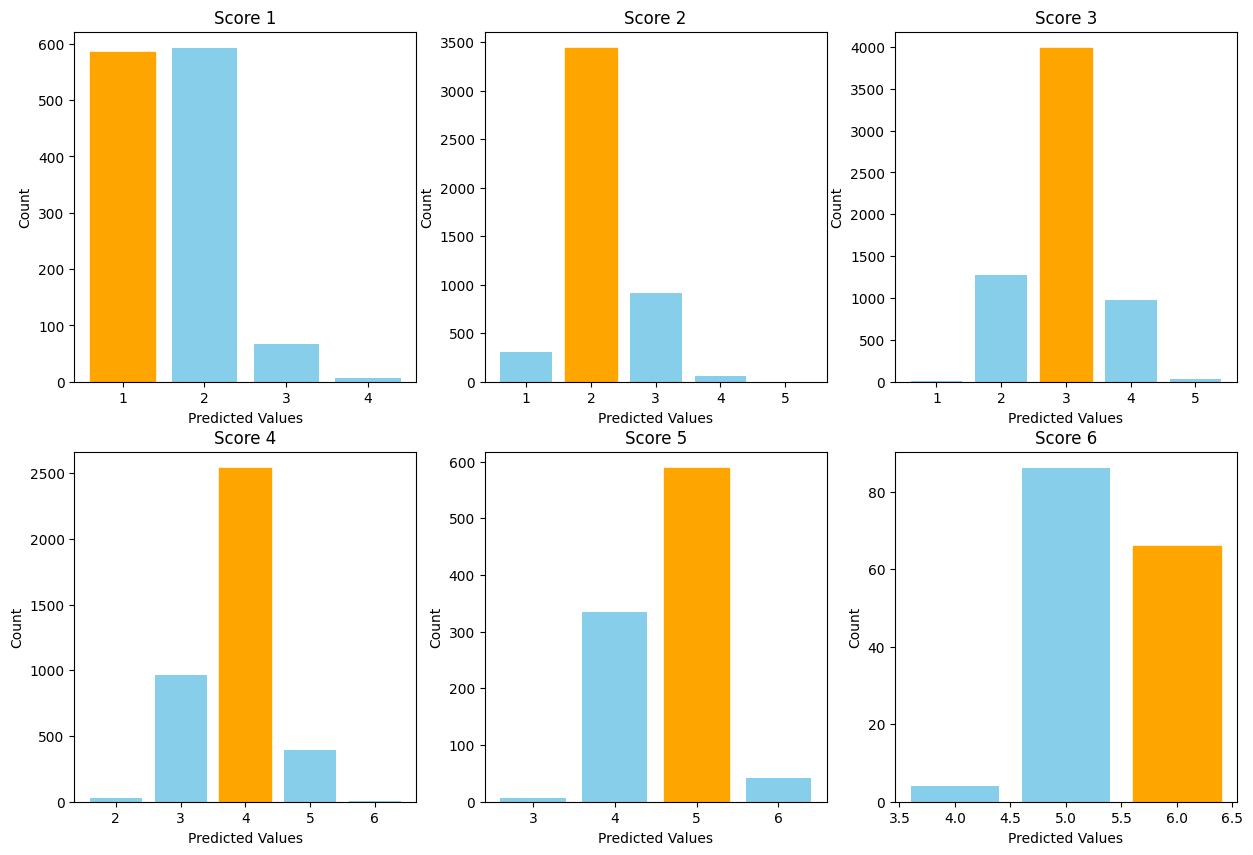

In [106]:
def analyze_preds(trues, preds):
    # Create dataframe
    model_prec = pd.DataFrame([trues, preds]).T
    model_prec.rename(columns = {0: 'trues', 1: 'preds'}, inplace=True)
    model_prec['correct'] = model_prec['trues'] == model_prec['preds']
    model_prec['count'] = model_prec.groupby('trues')['trues'].transform('count')
    model_prec['correct_count'] = model_prec.groupby('trues')['correct'].transform('sum')
    model_prec['correct_rate'] = model_prec['correct_count'] / model_prec['count']
    
    # Print binary correction rate
    print(model_prec[['trues', 'correct_rate', 'correct_count', 'count']].drop_duplicates().sort_values(by='trues'))
    
    # Plot predictions by score    
    def plot_model(ax, counts, true):
        bars = ax.bar(counts.index, counts.values, color='skyblue')

        # Find the index of the column with the specified label
        highlight_index = counts.index.get_loc(true)

        # Highlight the specified column
        bars[highlight_index].set_color('orange')

        ax.set_xlabel('Predicted Values')
        ax.set_ylabel('Count')
        ax.set_title("Score " + str(true))
    
    score_list = [1,2,3,4,5,6]
    test_pred_by_score = [model_prec[model_prec['trues'] ==  score]['preds'].value_counts() for score in score_list]

    # Create a figure and six subplots arranged in a 2x3 grid
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))    
    plot_model(axs[0, 0], test_pred_by_score[0], 1)
    plot_model(axs[0, 1], test_pred_by_score[1], 2)
    plot_model(axs[0, 2], test_pred_by_score[2], 3)
    plot_model(axs[1, 0], test_pred_by_score[3], 4)
    plot_model(axs[1, 1], test_pred_by_score[4], 5)
    plot_model(axs[1, 2], test_pred_by_score[5], 6)
    
analyze_preds(trues, preds)

### See how model workds

In [110]:
X_train_tmp = train_features.drop(columns=train_drop_columns)
y_train_tmp = train_features["score"]

def interact_tree(example_index, tree_index): 
    example = pd.DataFrame(X_train_tmp.iloc[example_index]).T
    score = y_train_tmp.iloc[example_index]
    
    print("Score: ", score)
    # Plot the first tree
    ax = lgb.plot_tree(models[1], tree_index=tree_index, figsize=(20, 8), show_info='data_percentage', example_case=example)
    plt.show()

Score:  3


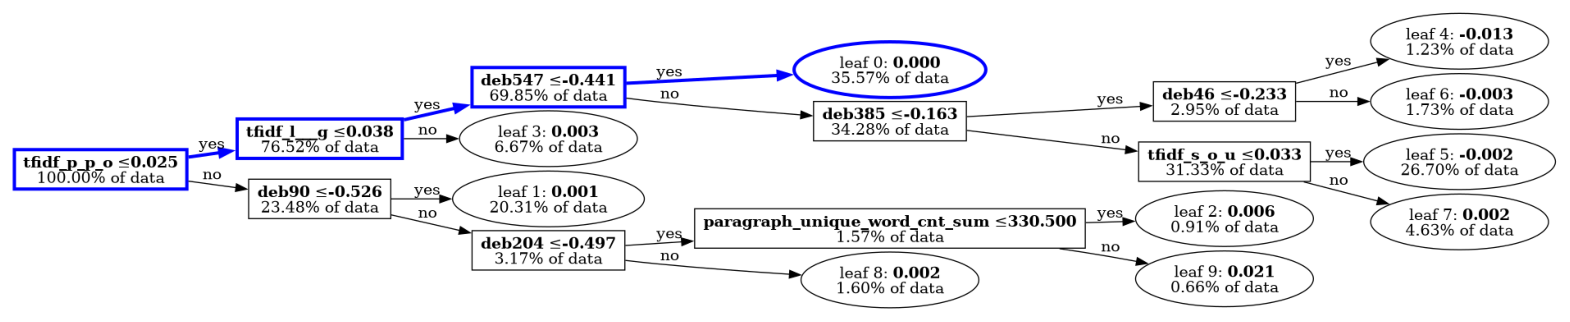

In [113]:
interact_tree(0,200)

In [114]:
top_features = ['splling_err_ratio', 'lexical_diversity', 'paragraph_count', 'word_count', 'DistanceToCentroid', 'word_len_sum']

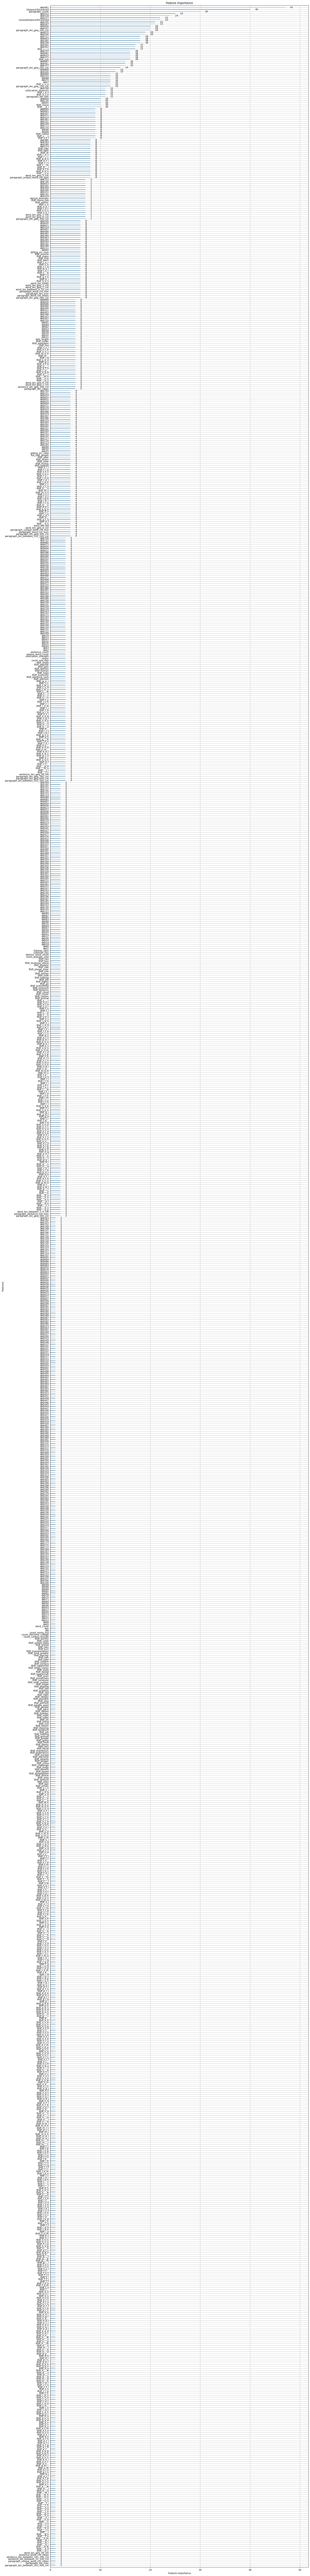

In [115]:
ax = lgb.plot_importance(models[1], figsize=(20, 200), importance_type="split")
plt.show()

In [116]:
import csv
feature_importance_df = pd.DataFrame()
feature_names = train_features.drop(columns=train_drop_columns).columns
feature_importance_df['Feature'] = feature_names

for i in range(0, 5):
    importance = models[i].feature_importances_
    feature_importance_df[f'Importance_{i}'] = importance

feature_importance_df.to_csv("feature_importance.csv")

In [117]:
def show_feat_use(feat):
    ax = lgb.plot_split_value_histogram(models[2], figsize=(20, 8), feature=feat)
    plt.show()

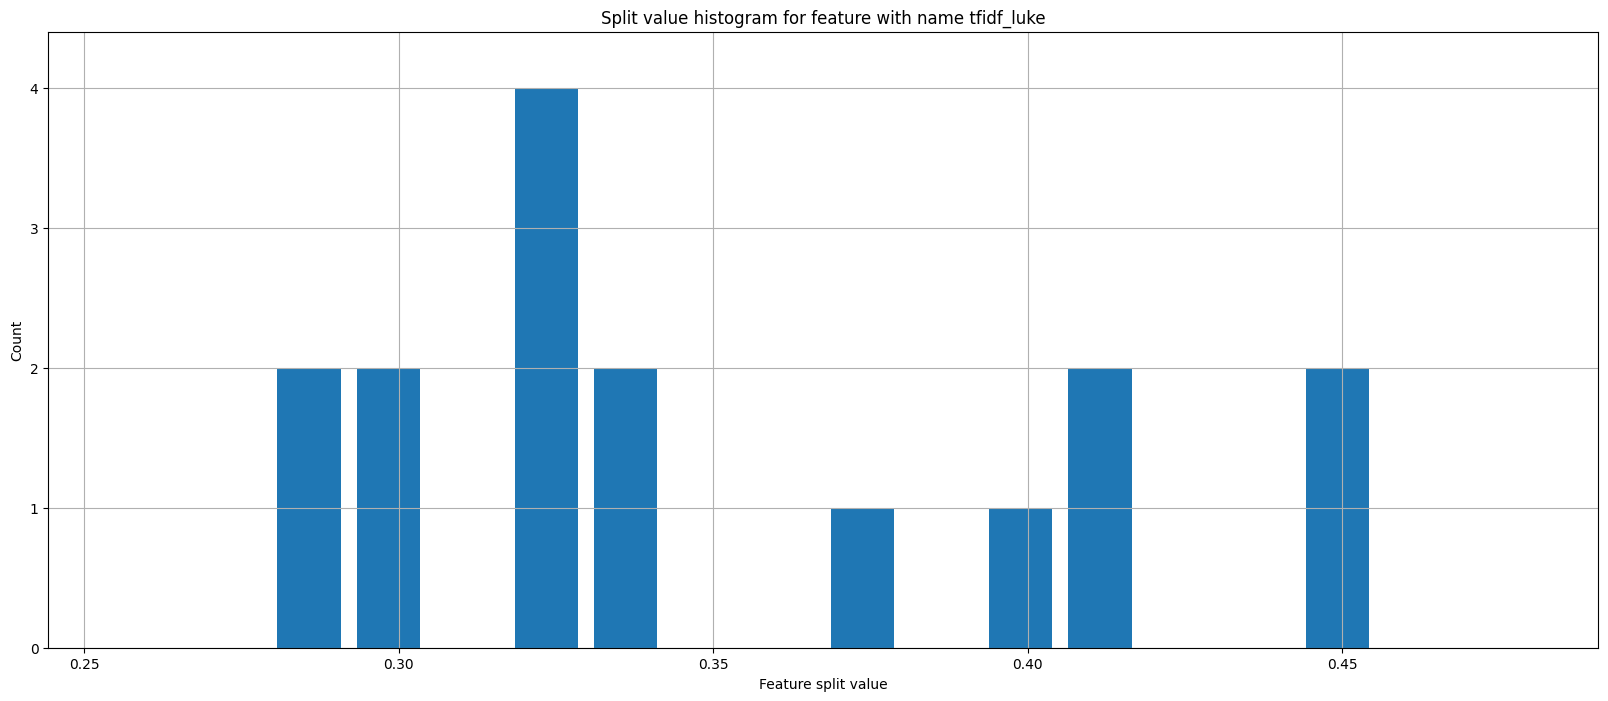

In [118]:
show_feat_use('tfidf_luke')

### How overfit model is 

In [120]:
def check_model_fit(model_id):
    ax = lgb.plot_metric(models[model_id])
    plt.show()

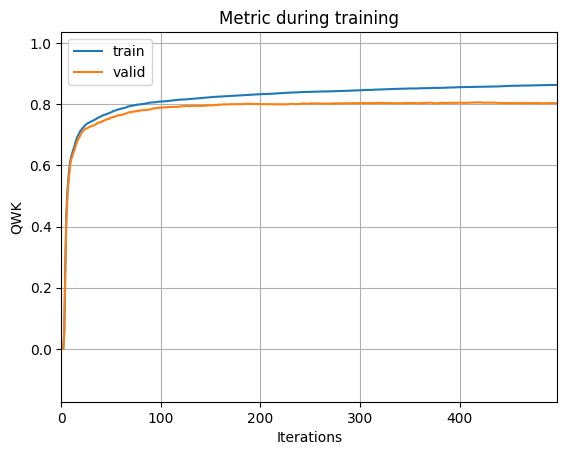

In [121]:
check_model_fit(2)

### Save Model

In [122]:
for i in range(len(models)):
    models[i].booster_.save_model(f'model_{i}.txt')

## Prediction

In [107]:
test_features

,essay_id,paragraph_len_between_1_100_cnt,paragraph_len_between_101_200_cnt,paragraph_len_between_201_300_cnt,paragraph_len_between_301_400_cnt,paragraph_len_between_401_500_cnt,paragraph_len_between_501_600_cnt,paragraph_len_between_601_800_cnt,paragraph_len_geq_100_cnt,paragraph_len_geq_150_cnt,...,deb759,deb760,deb761,deb762,deb763,deb764,deb765,deb766,deb767,deb768
0,000d118,0,0,0,0,0,0,0,1,1,...,-0.191920,-0.201104,0.087497,-0.392641,-0.401659,-0.046133,-0.051493,0.499923,0.116558,0.284129
1,000fe60,0,1,1,2,1,0,0,5,5,...,0.190499,-0.094903,0.088488,-0.078170,-0.038633,0.153840,0.166372,0.661949,-0.288759,0.188611
2,001ab80,0,0,0,0,1,1,0,4,4,...,0.094390,0.018927,-0.025737,-0.494094,0.171774,0.162165,-0.178303,0.629336,-0.039709,0.199430


In [108]:
preds = []
for fold, model in enumerate(models):
    X_eval_cv = test_features.drop(columns=test_drop_columns)
    pred = model.predict(X_eval_cv) + a    
    pred[pred < 1] = 1
    pred[pred > 6] = 6
    preds.append(pred)

# Combining the 5 model results
for i, pred in enumerate(preds):
    test_features[f"score_pred_{i}"] = pred
test_features["score"] = np.round(test_features[[f"score_pred_{fold}" for fold in range(n_splits)]].mean(axis=1),0).astype('int32')

# Submit to CSV
test_features[["essay_id", "score"]].to_csv("submission.csv", index=False)

In [109]:
test_features.head()

,essay_id,paragraph_len_between_1_100_cnt,paragraph_len_between_101_200_cnt,paragraph_len_between_201_300_cnt,paragraph_len_between_301_400_cnt,paragraph_len_between_401_500_cnt,paragraph_len_between_501_600_cnt,paragraph_len_between_601_800_cnt,paragraph_len_geq_100_cnt,paragraph_len_geq_150_cnt,...,deb765,deb766,deb767,deb768,score_pred_0,score_pred_1,score_pred_2,score_pred_3,score_pred_4,score
0,000d118,0,0,0,0,0,0,0,1,1,...,-0.051493,0.499923,0.116558,0.284129,1.997355,1.915527,1.692040,1.751673,2.192902,2
1,000fe60,0,1,1,2,1,0,0,5,5,...,0.166372,0.661949,-0.288759,0.188611,2.979310,2.970132,2.908959,2.976028,2.875594,3
2,001ab80,0,0,0,0,1,1,0,4,4,...,-0.178303,0.629336,-0.039709,0.199430,4.297635,4.378206,4.214724,4.228971,4.331428,4
